# 📊 Análise de Performance de Estudantes

O objetivo desta análise é identificar fatores que influenciam o desempenho acadêmico dos estudantes, utilizando técnicas de análise exploratória de dados (EDA).

In [3]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

📂 2. Visualização Inicial do DataFrame

📌 2.1 Leitura da base

In [4]:
#Leitura da base

df = pd.read_excel('data/Analise_Performance_Estudantes_modificado 1.xlsx')

display(df.head()) #Nao precisamos nenhum outro parametro

print('-----------------------------------------------')

display(df.tail())

print('-----------------------------------------------')

df.info()


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


-----------------------------------------------


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
4995,masculino,grupo_D,algum curso tecnico,lanche,nenhum,67,67,55
4996,feminino,grupo_B,algum curso tecnico,lanche,nenhum,67,61,56
4997,feminino,grupo_C,curso tecnológico,lanche,completo,51,63,55
4998,masculino,grupo_E,bacharelado,padrao,nenhum,60,46,55
4999,feminino,grupo_C,bacharelado,lanche,nenhum,78,82,87


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   genero                         5000 non-null   object
 1   grupo_etnico                   5000 non-null   object
 2   nivel_escolaridade_dos_pais    5000 non-null   object
 3   almoco                         5000 non-null   object
 4   curso_preparatorio_para_teste  5000 non-null   object
 5   nota_matematica                5000 non-null   int64 
 6   nota_leitura                   5000 non-null   int64 
 7   nota_escrita                   5000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


 Verificação de integridade:

 O dataset possui 5.000 linhas e 7 colunas.
 
 Confirmada a ausência de valores nulos e tipagem correta das variáveis.

🧹 3. Tratamento de Dados

In [5]:
#Mudança de nome das colunas
df = df.rename(columns={
    'gender': 'genero',
    'race/ethnicity': 'grupo_etnico',
    'parental level of education': 'nivel_escolaridade_dos_pais',
    'lunch': 'almoco',
    'test preparation course': 'curso_preparatorio_para_teste',
    'math score': 'nota_matematica',
    'reading score': 'nota_leitura',
    'writing score': 'nota_escrita'    
})
display(df.head())


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


 Tradução sistemática das colunas para melhor entendimento dos dados
 
 Foco: Clareza e padronização da nomenclatura

In [6]:
# Valores unicos em cadas coluna 
for column in df.columns: 
    print(f'Valores unicos na coluna {column}: ')
    if df[column].dtype == 'object':
        print(df[column].unique())
    else: 
        print(df[column].nunique())
    print('-' * 30)

Valores unicos na coluna genero: 
['feminino' 'masculino']
------------------------------
Valores unicos na coluna grupo_etnico: 
['grupo_B' 'grupo_C' 'grupo_A' 'grupo_D' 'grupo_E']
------------------------------
Valores unicos na coluna nivel_escolaridade_dos_pais: 
['bacharelado' 'algum curso superior' 'mestrado' 'curso tecnológico'
 'ensino médio' 'algum curso tecnico']
------------------------------
Valores unicos na coluna almoco: 
['padrao' 'lanche']
------------------------------
Valores unicos na coluna curso_preparatorio_para_teste: 
['nenhum' 'completo']
------------------------------
Valores unicos na coluna nota_matematica: 
87
------------------------------
Valores unicos na coluna nota_leitura: 
82
------------------------------
Valores unicos na coluna nota_escrita: 
86
------------------------------


3.1 Padronização de nomes

In [7]:
df['genero'] = df['genero'].replace({'female': 'feminino', 'male': 'masculino'})
display(df.head())

df['grupo_etnico'] = df['grupo_etnico'].replace({
    'group A': 'grupo_A',
    'group B': 'grupo_B',
    'group C': 'grupo_C',
    'group D': 'grupo_D',
    'group E': 'grupo_E'
})
display(df.head())

df['nivel_escolaridade_dos_pais'] = df['nivel_escolaridade_dos_pais'].replace({
    "bachelor's degree": 'bacharelado',
    'some college': 'algum curso superior',
    "master's degree": 'mestrado',
    "associate's degree": 'curso tecnológico',
    'high school': 'ensino médio',
    'some high school': 'algum curso tecnico'
})
display(df.head())

df['almoco'] = df['almoco'].replace({
    'standard': 'padrao',
    'free/reduced': 'lanche'
})
display(df.head())

df['curso_preparatorio_para_teste'] = df['curso_preparatorio_para_teste'].replace({
    'none': 'nenhum',
    'completed': 'completo'
})
display(df.head())

,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


,genero,grupo_etnico,nivel_escolaridade_dos_pais,almoco,curso_preparatorio_para_teste,nota_matematica,nota_leitura,nota_escrita
0,feminino,grupo_B,bacharelado,padrao,nenhum,72,72,74
1,feminino,grupo_C,algum curso superior,padrao,completo,69,90,88
2,feminino,grupo_B,mestrado,padrao,nenhum,90,95,93
3,masculino,grupo_A,curso tecnológico,lanche,nenhum,47,57,44
4,masculino,grupo_C,algum curso superior,padrao,nenhum,76,78,75


📈 4. Análise Exploratória

In [8]:
probabilidade_genero = df['genero'].value_counts(normalize=True) * 100
#Exibir a probabilidade
print('Probabilidade por Genero: ')
print(probabilidade_genero)

Probabilidade por Genero: 
genero
feminino     52.24
masculino    47.76
Name: proportion, dtype: float64


A base de dados apresenta uma distribuição demográfica equilibrada, com uma leve predominância do público feminino (52,2%) sobre o masculino (47,8%)

In [13]:
probabilidade_nivel_escolaridade_pais = df['nivel_escolaridade_dos_pais'].value_counts()
print(probabilidade_nivel_escolaridade_pais)

nivel_escolaridade_dos_pais
algum curso superior    1151
bacharelado             1055
curso tecnológico        965
mestrado                 776
ensino médio             641
algum curso tecnico      412
Name: count, dtype: int64


Ao analisar o perfil de instrução dos responsáveis, notamos uma predominância de formação acadêmica ou técnica. Apenas uma minoria (12,8% ou 641 indivíduos) possui apenas o nível médio completo.

In [9]:
# Calcular a probabilidade para cada grupo etnico
probabilidade_grupo_etnico = df['grupo_etnico'].value_counts(normalize=True) * 100
#Exibir a probabilidade 
print('Probabilidade por grupo etnico: ')
print(probabilidade_grupo_etnico)

Probabilidade por grupo etnico: 
grupo_etnico
grupo_B    29.74
grupo_C    27.52
grupo_A    16.96
grupo_D    16.70
grupo_E     9.08
Name: proportion, dtype: float64


Existe uma disparidade estatística significativa nas notas entre os grupos, ou a performance é homogênea independente da etnia?

5. Graficos

Este projeto possui um caráter experimental e analítico. Além da exploração dos dados, o objetivo é realizar um estudo comparativo entre diferentes bibliotecas de visualização (como Matplotlib, Seaborn e Plotly), identificando qual ferramenta oferece a melhor densidade de informação e estética para os insights apresentados.

In [40]:
categoria_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

for col in categoria_columns:
    counts = df[col].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribuicao por {col}')
    fig.show()

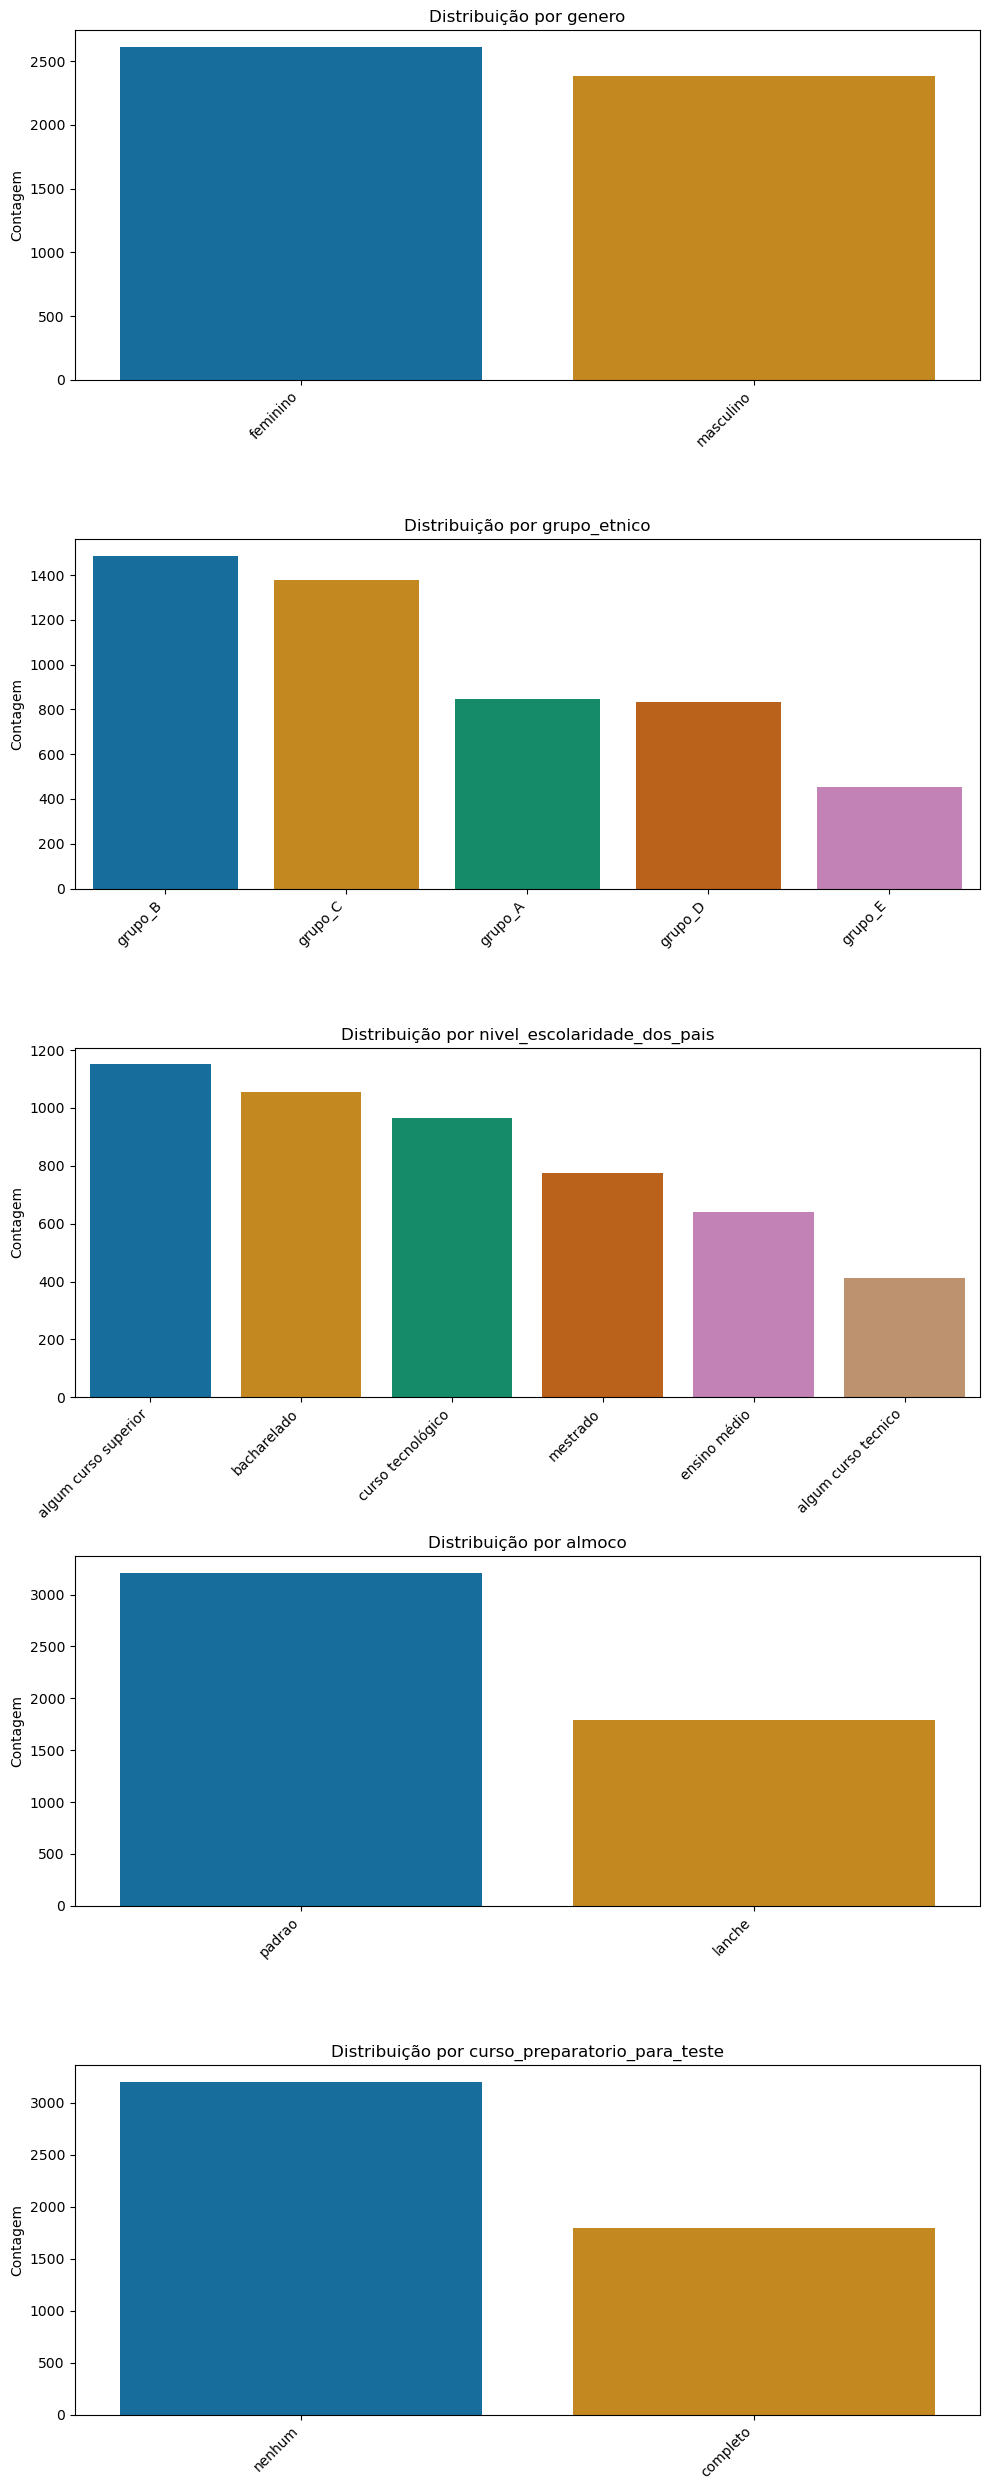

In [41]:
#Graficos de coluna utilizando contagem absoluta
categoria_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

plt.figure(figsize=(10, 25)) # Ajustando o tamanho da figura 

for i,col in enumerate(categoria_columns):
    plt.subplot(len(categoria_columns), 1, i + 1) # Alterando a grade de subplot para uma coluna
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette='colorblind') #Usando paleta para daltônicos
    plt.title(f'Distribuição por {col}')
    plt.ylabel('Contagem')
    plt.xlabel('')
    plt.xticks(rotation=45,ha='right')

plt.tight_layout()
plt.show()

    

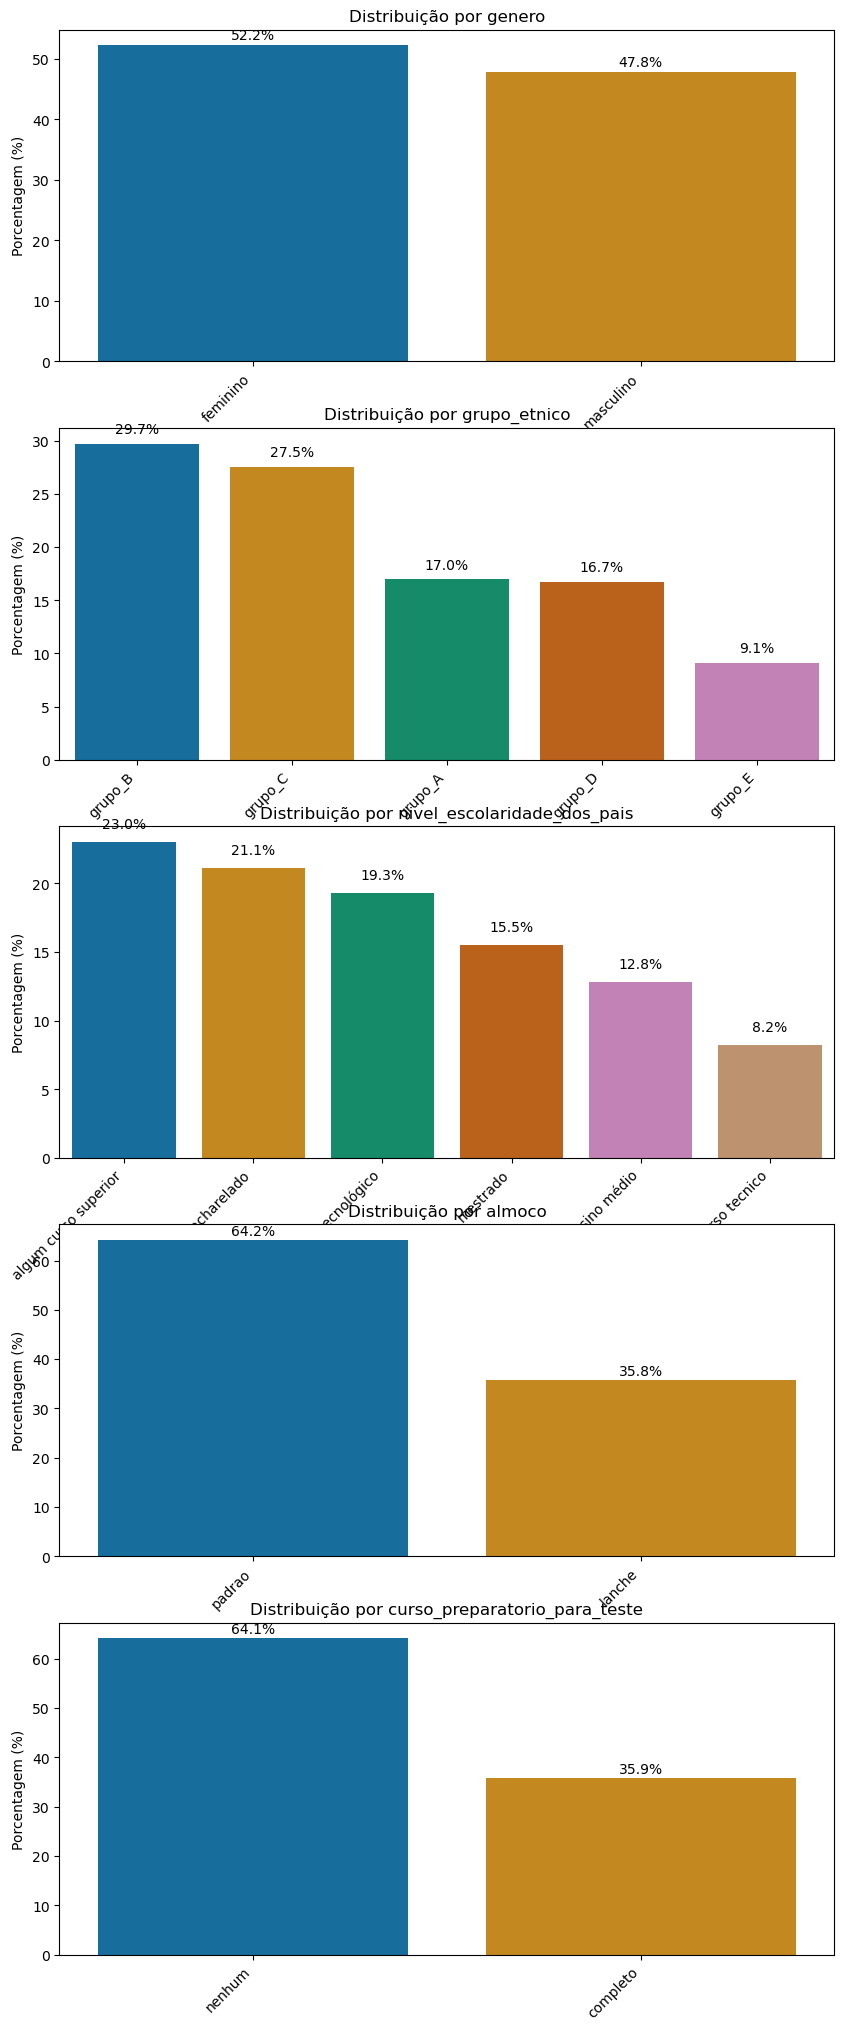

In [42]:
#Graficos de colunas utilizando porcentagem 
categoria_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']
plt.figure(figsize=(10, 25))

for i, col in enumerate(categoria_columns):
    plt.subplot(len(categoria_columns), 1, i + 1)
    counts = df[col].value_counts()
    porcentagem = ( counts / counts.sum() ) * 100

    sns.barplot(x=counts.index, y=porcentagem, palette='colorblind') # Usando paleta para daltônicos para gráfico de barras com porcentagens
    plt.title(f'Distribuição por {col}')
    plt.ylabel('Porcentagem (%)')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right') 
 
    for j, p in enumerate(porcentagem):
        plt.text(j, p + 1, f'{p:.1f}%', ha='center')


In [43]:
#Gráfico de colunas com a plotly
categorical_columns = ['genero', 'grupo_etnico', 'nivel_escolaridade_dos_pais', 'almoco', 'curso_preparatorio_para_teste']

for col in categorical_columns:
    counts = df[col].value_counts()
    percentages = counts / counts.sum() * 100
    fig = px.bar(x=percentages.index, y=percentages.values, title=f'Distribuição por {col} (%)',
                 labels={'x': '','y': 'Porcentagem (%)'}, color_discrete_sequence=px.colors.sequential.Cividis)

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

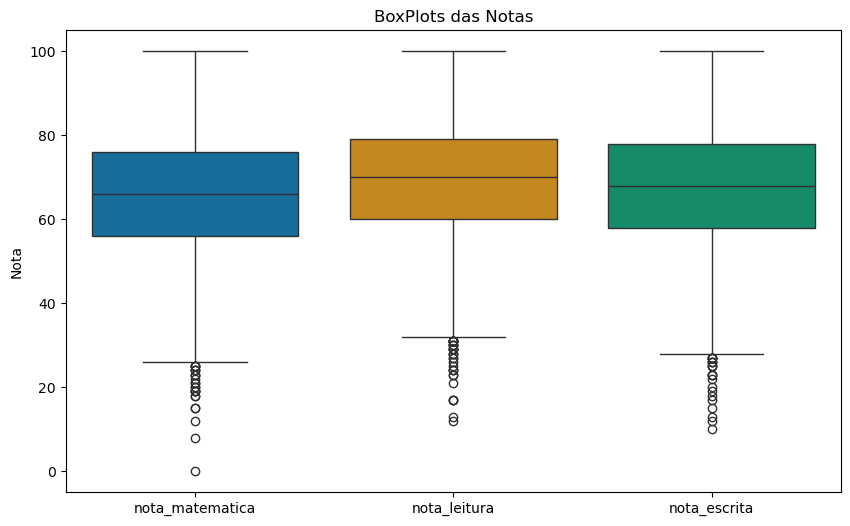

In [49]:
#Graficos boxplot
colunas_notas = ['nota_matematica', 'nota_leitura', 'nota_escrita']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[colunas_notas], palette='colorblind')
plt.title('BoxPlots das Notas')
plt.ylabel('Nota')
plt.show()

Mediana: Observa-se que a performance em Leitura apresenta a mediana mais elevada, seguida por Escrita e, por fim, Matemática.

Dispersão: A amplitude interquartílica ($IQR$) é similar entre as disciplinas, indicando uma variação de notas consistente em todo o dataset.

Outliers: Identificamos uma presença significativa de outliers na extremidade inferior em todas as matérias, com casos críticos de notas próximas a zero, especialmente em Matemática.

6. Análise Comparativa

Para melhorar nossa analise vamos criar uma coluna de média geral das notas

In [ ]:
df['media_geral'] = (
    df['nota_matematica'] +
    df['nota_leitura'] +
    df['nota_escrita']
) / 3

df['media_geral'].describe()

<bound method NDFrame.describe of 0       72.666667
1       82.333333
2       92.666667
3       49.333333
4       76.333333
          ...    
4995    63.000000
4996    61.333333
4997    56.333333
4998    53.666667
4999    82.333333
Name: media_geral, Length: 5000, dtype: float64>

In [17]:
df.groupby('genero')['media_geral'].mean()

genero
feminino     67.973456
masculino    67.470408
Name: media_geral, dtype: float64

Existe uma paridade técnica entre os grupos, com o gênero feminino (67.97) apresentando uma leve vantagem decimal sobre o masculino (67.47).

In [19]:
df.groupby('curso_preparatorio_para_teste')['media_geral'].mean()

curso_preparatorio_para_teste
completo    68.583798
nenhum      67.257226
Name: media_geral, dtype: float64

Embora os alunos que concluíram o curso preparatório apresentem uma média superior, o incremento real é de apenas 1,32 pontos, pode parecer pequena individualmente, mas indica uma tendência de melhoria consistente.

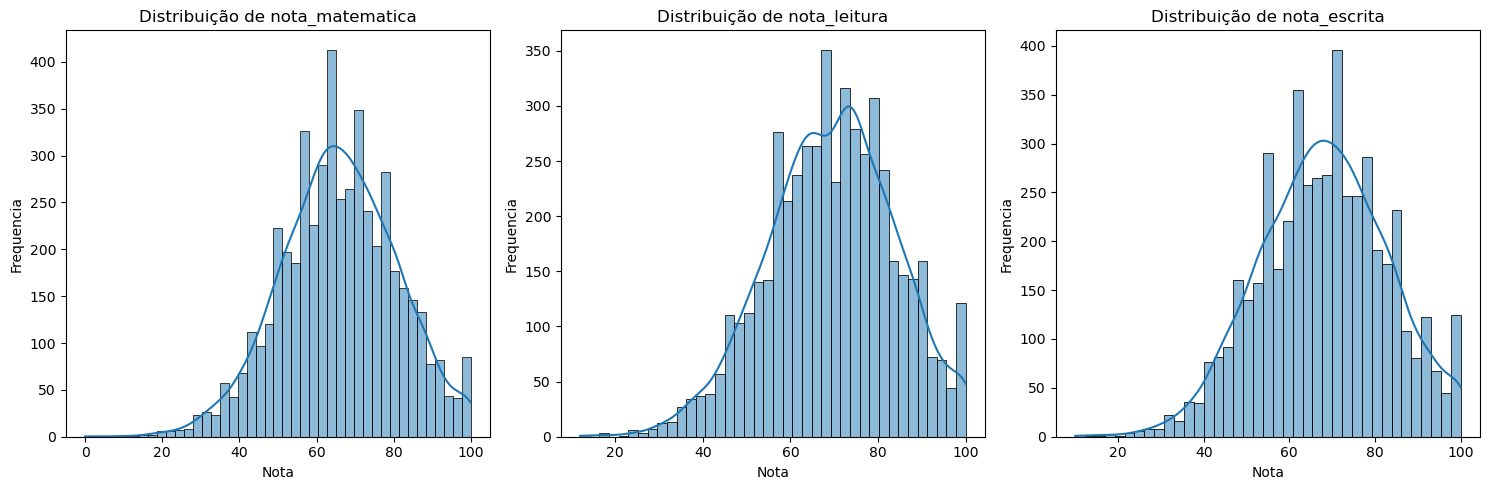

In [ ]:
#Correlação
colunas_notas = ['nota_matematica', 'nota_leitura', 'nota_escrita']
plt.figure(figsize=(15, 5)) 

for i, col in enumerate(colunas_notas): 
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, palette='viridis')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Nota')
    plt.ylabel('Frequencia')

plt.tight_layout()
plt.show()


As distribuições seguem um padrão próximo à Distribuição Normal. Isso indica que a maioria dos alunos se concentra na faixa central de notas, com poucos casos de desempenho extremo (muito baixo ou muito alto).

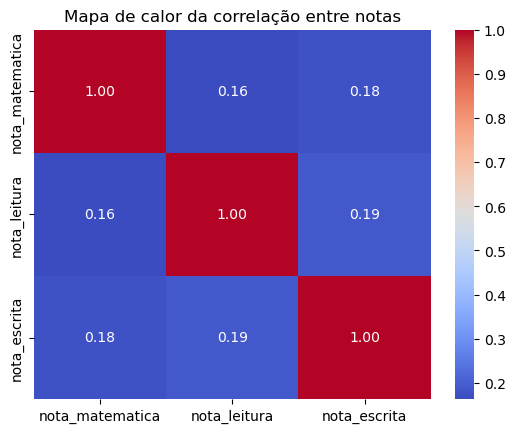

In [48]:
# Mapa de calor de correlação
colunas_notas = ['nota_matematica', 'nota_leitura', 'nota_escrita']
corelacao = df[colunas_notas].corr() #.corr calcula a correlacao par a par entre colunas numericas

plt.Figure(figsize=(6, 4))
sns.heatmap(corelacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor da correlação entre notas')
plt.show()

A correlação entre as disciplinas é considerada baixa. Ele indica que, neste dataset específico, o bom desempenho em uma matéria (como Leitura) não garante o sucesso em outra (como Matemática)

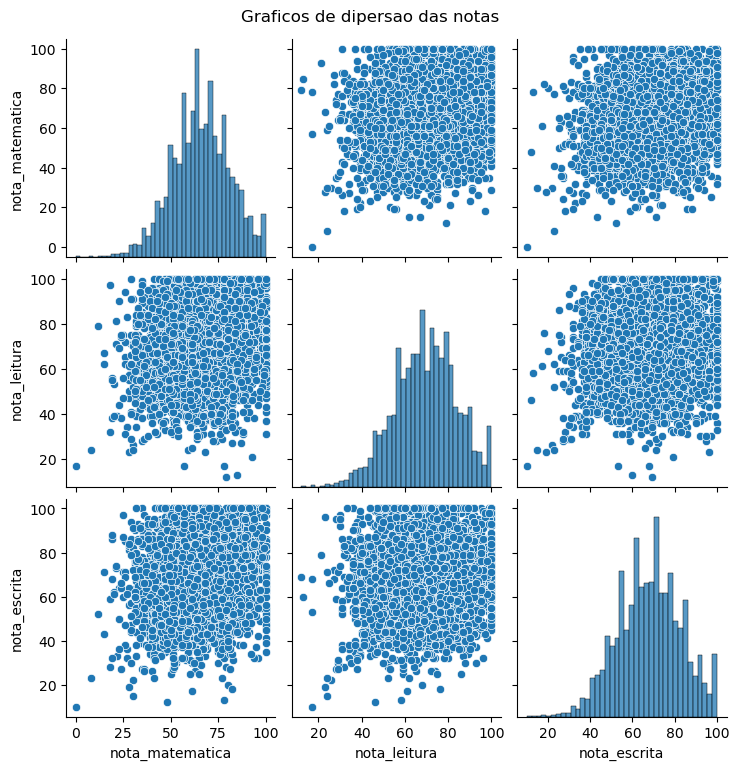

In [50]:
#Grafico de dispersao

colunas_notas = ['nota_matematica', 'nota_leitura', 'nota_escrita']
sns.pairplot(df[colunas_notas])
plt.suptitle('Graficos de dipersao das notas', y=1.02)
plt.show()